## Client, Scheduler and Workers

Dask functions through a distributed computing architecture consisting of three key components: ***Client, Scheduler, and Workers***.

1. **Client**:

- Acts as the user interface, accepting instructions from the programmer.
- These instructions typically involve operations on Dask collections like DataFrames or Arrays.
- The client translates these operations into a task graph, a representation of the computational steps required.
- The client then submits the task graph to the scheduler for further processing.

2. **Scheduler**:

- The central coordinator that manages the task graph.
- Analyzes the task graph, breaking it down into smaller, independent tasks.
- Optimizes task execution by considering factors like worker availability and data locality.
- Schedules these tasks for execution on available workers.
- Monitors worker progress, handling failures and redistributing tasks as needed.
- Communicates with clients, providing updates on task completion and overall progress.

3. **Workers**:

- The workhorses of the system, responsible for executing the individual tasks.
- Can be local processes running on the same machine as the client or remote processes distributed across a cluster.
- Each worker has its own memory and processing capabilities.
- Workers receive tasks from the scheduler, execute them on their local data, and return the results.
- May communicate with other workers to exchange data required for task completion.

<img src="https://raw.githubusercontent.com/coiled/pydata-global-dask/master/images/dask-cluster.svg"
     width="75%"
     alt="Dask cluster\">

*Source: Coiled Dask Tutorial (https://github.com/coiled/dask-mini-tutorial/tree/main)*

## Schedulers
We've explored the power of dask.delayed to build task graphs, like a blueprint for your calculations. But how do we actually run these plans and get the results? Using Dask Scheduler.

Dask offers different schedulers, each with its own strengths. While they all deliver the same final answer, their performance can vary. There are two main types:

- **Single-Machine Schedulers**: Perfect for crunching data on a single computer with multiple cores. They're simpler to set up and ideal for smaller datasets. (Think working with a small team on a project.)

- **Distributed Schedulers**: Designed to tackle massive datasets by distributing the workload across a cluster of machines. These are more complex to set up but offer significant speed boosts for big jobs. (Imagine having a whole team working on different parts of a giant puzzle simultaneously.)

Choosing the right scheduler depends on the size of your data and your computational needs. This ensures you get the most efficient processing for your specific task.

### Single-Machine Schedulers:
These schedulers are convenient because they don't require you to install additional software or configure complex systems. They leverage the standard libraries already present in Python.

Think of this as working on the problem yourself, but with a few extra hands. The scheduler acts like the project manager:

- It splits the big problem into smaller tasks.
- It assigns these tasks to different cores (like your computer's processors) available on your machine.
- It keeps track of the progress of each task and ensures they all work together efficiently.

**Scheduler Options:**

Dask offers three choices for how your chores(computations) get tackled on a single machine:

- **"Threads" Scheduler** (Default for Arrays, DataFrames, Delayed):

    - This option uses multiple threads within the same process. Think of it as having several helpers (threads) working on different chores simultaneously, but they all share the same resources like memory. It's efficient for CPU-bound tasks (tasks that require a lot of processing power).

- **"Processes" Scheduler**:

    - This option uses separate processes, each with its own memory space. Imagine having multiple assistants (processes) working on different chores independently, each with their own set of tools (memory). It's suitable for tasks that can be easily divided and don't require constant communication between chores.

- **"Single-Threaded" Scheduler** (Debugging):

    - This option acts like doing all the chores yourself (in a single thread), one after another. It's not very efficient for parallel processing, but it's valuable when you need to debug your code step-by-step or analyze how long each chore takes (profiling).

The best single-machine scheduler depends on the type of data you're working with (Dask Arrays, DataFrames) and the nature of your computations. Dask provides defaults for common scenarios, but you can choose the most suitable option for your specific task.

Now let's walk through a Dask array example where we will create a large array, perform computations (add the array to its transpose element-wise) using different single-machine schedulers, and measure the time taken for each computation.

In [46]:
# Create a Dask array
x = da.random.random((10000, 10000), chunks=(1000, 1000))

In [47]:
import time
# Define a function to measure computation time with different schedulers
def measure_time(scheduler):
    start_time = time.time()
    result = x + x.T
    result.compute(scheduler=scheduler)
    end_time = time.time()
    return end_time - start_time

In [48]:
# Measure computation time for each scheduler
time_threads = measure_time('threads')
time_processes = measure_time('processes')
time_single_threaded = measure_time('single-threaded')

# Print the results
print(f"Time taken with threads scheduler: {time_threads:.2f} seconds")
print(f"Time taken with processes scheduler: {time_processes:.2f} seconds")
print(f"Time taken with single-threaded scheduler: {time_single_threaded:.2f} seconds")

Time taken with threads scheduler: 0.65 seconds
Time taken with processes scheduler: 9.54 seconds
Time taken with single-threaded scheduler: 1.25 seconds


Let's perform the computations explicitly using each scheduler:

In [49]:
%%time
# Threads Scheduler
result_threads = (x + x.T).compute(scheduler='threads')
result_threads

CPU times: user 1.21 s, sys: 504 ms, total: 1.71 s
Wall time: 612 ms


array([[0.71305109, 0.79925   , 0.69045897, ..., 0.79031571, 1.3642289 ,
        1.01645242],
       [0.79925   , 0.54954226, 1.24268813, ..., 1.56469326, 0.48083818,
        0.14437689],
       [0.69045897, 1.24268813, 1.97916092, ..., 1.11665836, 0.72142631,
        0.59179018],
       ...,
       [0.79031571, 1.56469326, 1.11665836, ..., 1.55891379, 0.67445497,
        1.66286173],
       [1.3642289 , 0.48083818, 0.72142631, ..., 0.67445497, 0.68623478,
        1.19380453],
       [1.01645242, 0.14437689, 0.59179018, ..., 1.66286173, 1.19380453,
        1.37612826]])

In [50]:
%%time
# Processes Scheduler
result_processes = (x + x.T).compute(scheduler='processes')
result_processes

CPU times: user 1.46 s, sys: 3.17 s, total: 4.63 s
Wall time: 8.57 s


array([[0.71305109, 0.79925   , 0.69045897, ..., 0.79031571, 1.3642289 ,
        1.01645242],
       [0.79925   , 0.54954226, 1.24268813, ..., 1.56469326, 0.48083818,
        0.14437689],
       [0.69045897, 1.24268813, 1.97916092, ..., 1.11665836, 0.72142631,
        0.59179018],
       ...,
       [0.79031571, 1.56469326, 1.11665836, ..., 1.55891379, 0.67445497,
        1.66286173],
       [1.3642289 , 0.48083818, 0.72142631, ..., 0.67445497, 0.68623478,
        1.19380453],
       [1.01645242, 0.14437689, 0.59179018, ..., 1.66286173, 1.19380453,
        1.37612826]])

In [51]:
%%time
# Single-Threaded Scheduler
result_single_threaded = (x + x.T).compute(scheduler='single-threaded')
result_single_threaded

CPU times: user 913 ms, sys: 166 ms, total: 1.08 s
Wall time: 1.18 s


array([[0.71305109, 0.79925   , 0.69045897, ..., 0.79031571, 1.3642289 ,
        1.01645242],
       [0.79925   , 0.54954226, 1.24268813, ..., 1.56469326, 0.48083818,
        0.14437689],
       [0.69045897, 1.24268813, 1.97916092, ..., 1.11665836, 0.72142631,
        0.59179018],
       ...,
       [0.79031571, 1.56469326, 1.11665836, ..., 1.55891379, 0.67445497,
        1.66286173],
       [1.3642289 , 0.48083818, 0.72142631, ..., 0.67445497, 0.68623478,
        1.19380453],
       [1.01645242, 0.14437689, 0.59179018, ..., 1.66286173, 1.19380453,
        1.37612826]])

As you can see, for performing operation in a Dask Array, the **threads** scheduler finishes ***~48%*** faster than using the **single-threaded**,and ***~93%*** faster that the **processes** scheduler. 

In Dask arrays, using the threads scheduler is generally preferable to both single-threaded and processes schedulers. Let's compare them:

**Threads vs. Single-Threaded:**

- *Utilization of CPU Cores*:

    - *Threads Scheduler*:
        - Uses multiple threads to divide computations among available CPU cores.
        - Can increase performance by doing calculations in parallel.
    - *Single-Threaded Scheduler*:
        - Executes calculations sequentially in a single thread.
        - Lacks parallelism and cannot make full use of multi-core CPUs.

- *Efficiency in Computation*:

    - The task of adding a matrix and its transpose benefits from parallel processing since each member in the final matrix can be calculated independently.
    - The "Threads" scheduler uses parallelism to accelerate the process by distributing the workload among multiple threads.
    - In contrast, the "Single-Threaded" scheduler performs calculations sequentially, which leads to higher processing times for large datasets.

**Threads vs. Processes:**

- *Parallelism and Shared Memory*:

    - *Threads Scheduler*:
        - Uses multiple threads within the same process.
        - Threads share the same memory space, allowing for efficient communication and data sharing. 
    - *Processes Scheduler*:
        - Uses separate processes, each with its own memory space.
        - Processes have independent memory, leading to higher memory overhead and requiring inter-process communication (IPC) for data sharing.

          ***Inter-Process Communication (IPC):*** Processes cannot directly access one other's memory, therefore they need to use IPC mechanisms to transfer data and coordinate actions. IPC offers a variety of ways (such as pipes, message queues, shared memory, semaphores, and sockets) for processes to exchange data and synchronize their tasks. While IPC allows processes to communicate, it adds complexity and overhead compared to threads, which may transfer data directly without such procedures.

- *Efficiency in Computation*:
    - For the given task of computing the sum of a matrix and its transpose (result = x + x.T), the operation involves numerical computations on large arrays.
    - The "Threads" scheduler can parallelize these computations across multiple threads, effectively utilizing multiple CPU cores and reducing the overall computation time.
    - In contrast, the "Processes" scheduler has additional overhead due to IPC and managing separate memory spaces, making it less efficient for this type of computation.

### Exercise 1 (Breakout rooms)
- Create a Dask array of random integer numbers ranging from 0 to 40. This data will represent temperatures in Celsius.
- Convert each element in the array to fahrenheit using the following:
    - Threads Scheduler
    - Single-Threaded Scheduler
    - Processes Scheduler
- Use the %%time command to compare the computation time for each scheduler.
- Which one is better and why?

In [ ]:
#import libraries
#Your code goes here

# Create a Dask array of random integer numbers (temperatures in Celsius)
#Your code goes here

In [ ]:

# Convert Celsius to Fahrenheit using threads scheduler
#Your code goes here

In [ ]:

# Convert Celsius to Fahrenheit using single-threaded scheduler
#Your code goes here

In [1]:

# Convert Celsius to Fahrenheit using processes scheduler
#Your code goes here

### Distributed Scheduler

A distributed scheduler in Dask coordinates work across multiple workers (computers or processes) in a cluster. It divides the tasks among the workers, handles data transfer between them, and ensures that computations are executed in an optimal manner.

Imagine you have a team of friends, each with their own computer. You can split the problem even further and solve it much faster, the distributed scheduler acts like a coordinator for this team:

- It splits the big problem into even smaller tasks than the single machine scheduler.
- It sends these tasks to different computers (workers) in your network.
- It communicates with all the workers, collects their results, and combines them to get the final solution.

**Before we start with the exercise:**
- Open your terminal and run the following command : ***conda install -c conda-forge msgpack-python==1.0.5***

Dask depends on the msgpack-python package, which includes Dask Distributed. It is used to serialize Python objects into a compact binary format, which is necessary for fast communication between different components of a distributed Dask computation, particularly when moving data across processes or machines.

By providing a specific version (1.0.5) of msgpack-python with the conda install -c conda-forge msgpack-python==1.0.5 command, you ensure that your Dask Distributed environment uses that version. This can help ensure compatibility with certain versions of Dask or solve compatibility concerns with later versions of msgpack-python.

Lets first import the necessary libraries:

In [1]:
import dask.array as da
from dask.distributed import Client, LocalCluster

We start by setting up a Dask cluster on our local machine. Think of this cluster as a team of workers ready to handle our computations.

In [9]:
# Start a local Dask cluster
cluster = LocalCluster()

/Users/tnchevez/anaconda3/lib/python3.11/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 52790 instead
  warnings.warn(


Now, lets create Dask client and connect it to the cluster. This client will be our interface for managing and assigning tasks to the workers in the cluster.

In [10]:
# Connect a client to the cluster
client = Client(cluster)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:52790/status,
Dashboard: http://127.0.0.1:52790/status,Workers: 4
Total threads: 12,Total memory: 16.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:52791,Workers: 4
Dashboard: http://127.0.0.1:52790/status,Total threads: 12
Started: Just now,Total memory: 16.00 GiB
Comm: tcp://127.0.0.1:52802,Total threads: 3
Dashboard: http://127.0.0.1:52807/status,Memory: 4.00 GiB
Nanny: tcp://127.0.0.1:52794,


When you return the client object, it displays essential information about the Dask client and its connection to the cluster. This includes a unique client ID for identification, details about the connection method (like whether it's connected directly or via a cluster object), the type of cluster being used (such as a local cluster or a distributed cluster), and the URL for accessing the Dask dashboard to monitor cluster performance. 

Additionally, it provides information about the cluster's configuration, such as the number of workers, total memory available, scheduler details, and worker information. This summary helps users understand the setup and status of their Dask client and cluster for effective distributed computing.

The next step is to create a dask array with random values of size (1000,1000) and see how the **Task Stream** graph changes in the Diagnosis Dashboard when we modify the size of the array chunks and perform operations on the array. 

The **Task Stream** shows the individual tasks for accross multiple threads. In this case, we have 12 total amount of threads.

In [11]:
# Create a Dask array with random values
shape = (1000, 1000)
chunks = (100, 100)
x = da.random.random(size=shape, chunks=chunks)

In [13]:
x.compute()

array([[0.16979052, 0.33278608, 0.14799929, ..., 0.77328603, 0.21982912,
        0.73916354],
       [0.13802358, 0.6228839 , 0.04063477, ..., 0.77852063, 0.43853015,
        0.37336539],
       [0.82286536, 0.15844273, 0.36524088, ..., 0.8983228 , 0.22249307,
        0.42448784],
       ...,
       [0.59355484, 0.92293266, 0.31812596, ..., 0.72335656, 0.47818944,
        0.72062259],
       [0.22935037, 0.55426169, 0.49912487, ..., 0.33164395, 0.6487044 ,
        0.3397373 ],
       [0.13996702, 0.63363592, 0.63058325, ..., 0.12276817, 0.47456221,
        0.22486546]])

2024-06-10 21:58:07,604 - distributed.nanny - WARNING - Restarting worker
2024-06-10 21:58:07,617 - distributed.nanny - WARNING - Restarting worker
2024-06-10 21:58:07,633 - distributed.nanny - WARNING - Restarting worker
2024-06-10 21:58:07,731 - distributed.nanny - WARNING - Restarting worker
2024-06-10 21:58:07,734 - distributed.nanny - WARNING - Restarting worker
2024-06-10 21:58:07,751 - distributed.nanny - WARNING - Restarting worker
2024-06-10 21:58:08,040 - distributed.nanny - WARNING - Restarting worker
2024-06-10 21:58:08,042 - distributed.nanny - WARNING - Restarting worker
2024-06-10 21:58:08,053 - distributed.nanny - WARNING - Restarting worker
2024-06-10 21:58:09,055 - distributed.nanny - WARNING - Restarting worker
2024-06-10 21:58:09,057 - distributed.nanny - WARNING - Restarting worker
2024-06-10 21:58:09,058 - distributed.nanny - WARNING - Restarting worker


By reading the ***Task Stream*** in our Client Dashboard we can see the number of threads (counting the rectangles down) and how as we change the chunk size of our array, the number of tasks in each thread increases.

*Learning how to read the Dashboard Diagnostics goes beyond the scope of this class, but if you are curious and interested, you can checkout the resource below:*
- Dask Dashboard Diagnostics¶ = https://docs.dask.org/en/stable/dashboard.html

Now, lets perform some statistical operations on our array, such as finding the mean, standard deviation, sum, and maximum value. 

In [6]:
# Perform statistical and mathematical operations
mean_x = x.mean()
std_x = x.std()
sum_x = x.sum()
max_x = x.max()

If we go and check the **Task Stream** we will see that it has not changed, this means that additional tasks has not been added or removed from the threads in our local Cluster. 

**Why do you think this is?**

In [7]:
# Print the results of the operations
print("Mean of the array:", mean_x.compute())
print("Standard deviation of the array:", std_x.compute())
print("Sum of the array:", sum_x.compute())
print("Maximum value in the array:", max_x.compute())

Mean of the array: 0.5000783211931393
Standard deviation of the array: 0.288598859309666
Sum of the array: 500078.3211931393
Maximum value in the array: 0.9999989259798249


When we print and calculate each delayed product, we can see in the *Task Stream* how many new tasks have been added to each thread in the local cluster. 

Finally, we close the client and cluster to release the resources and shut down the Dask cluster. 

In [8]:
# Close the client and cluster
client.close()
cluster.close()


# SIKU - Dask DataFrame
Before we use SIKU to process an even larger DataFrame, let's do some local testing with a smaller version of the dask dataframe:

- Open the Create_Data.py python script.
- Find the variables ***num_files*** and ***num_rows_per_file*** and change their values to 100 and 500, respectively. This will generate a flight_data folder containing 100 csv files with flight information (500 rows each).
- Save the script and run it in the terminal.

The new flights_data csv files contain new randomly generated flight information data with the following columns:
- **flight_id:** A unique identifier for each flight.
- **origin:** The airport code where the flight originated from (e.g., JFK, LGA, EWR).
- **destination:** The airport code where the flight is headed to (randomly chosen from the list of airports).
- **airline:** The airline operating the flight (randomly chosen from Delta, United, American).
- **status:** The status of the flight, which can be 'On Time', 'Delayed', or 'Cancelled'.
- **delay_minutes:** The delay in minutes for the flight. If the flight is 'Cancelled', the value is set to -100; otherwise, it could be 0 for no delay or a positive integer indicating the delay time.
- **num_passengers:** The number of passengers on the flight, randomly generated within the range of 150 to 700.
- **distance:** The distance traveled by the flight in kilometers, randomly generated within the range of 1000 to 10000.
- **flight_duration:** The duration of the flight in minutes, randomly generated within the range of 30 to 600.


Once the folder is created, lets do some dask delayed and dask dataframe operations:

First, let's load the needed libraries:

In [13]:
import os
import dask.dataframe as dd
from dask import delayed, compute
import matplotlib.pyplot as plt

Now, let's load the multiple datasets in the flights_data folder into a dask dataframe:

In [45]:
# Specify the directory containing the generated flight CSV files
files = os.path.join('flights_data', '*.csv')

# Read the CSV files using Dask, with appropriate parsing options
ddf = dd.read_csv(files,
                  dtype={"flight_id": int,
                         "origin": str,
                         "destination": str,
                         "airline": str,
                         "status": str,
                         "delay_minutes": int,
                         "num_passengers": int,
                         "distance": int,
                         "flight_duration": int})

ddf.compute()

,flight_id,origin,destination,airline,status,delay_minutes,num_passengers,distance,flight_duration
0,0,JFK,JFK,Delta,Delayed,179,328,1444,451
1,1,JFK,JFK,Delta,Cancelled,-100,327,2676,538
2,2,JFK,LGA,American,Delayed,81,286,1455,515
3,3,EWR,LGA,United,Delayed,150,520,2947,215
4,4,EWR,LGA,Delta,Delayed,0,630,1361,206
...,...,...,...,...,...,...,...,...,...
960,98960,LGA,JFK,Delta,Delayed,240,162,1166,201
961,98961,LGA,EWR,American,On Time,168,445,7739,339
962,98962,JFK,EWR,United,On Time,138,661,2099,368
963,98963,LGA,EWR,American,Cancelled,-100,699,6354,180


Next, let's create a delayed function to calculate the average delay for each origin airport and airline:

In [46]:
@delayed
def calculate_average_delay_per_airline(df, airline):
    filtered_df = df[df['airline'] == airline]
    return filtered_df.groupby('origin')['delay_minutes'].mean()

Let's get the list of airlines, calculate the average delay per origin for each airline, and compute the delayed results:

In [47]:
# List of airlines
airlines = ddf['airline'].unique().compute()

# Calculate average delay per origin for each airline
results = [calculate_average_delay_per_airline(ddf, airline) for airline in airlines]

# Compute the delayed results
average_delays = compute(*results)

We will now create subplots to visualize the average delay for each origin airport by airline:

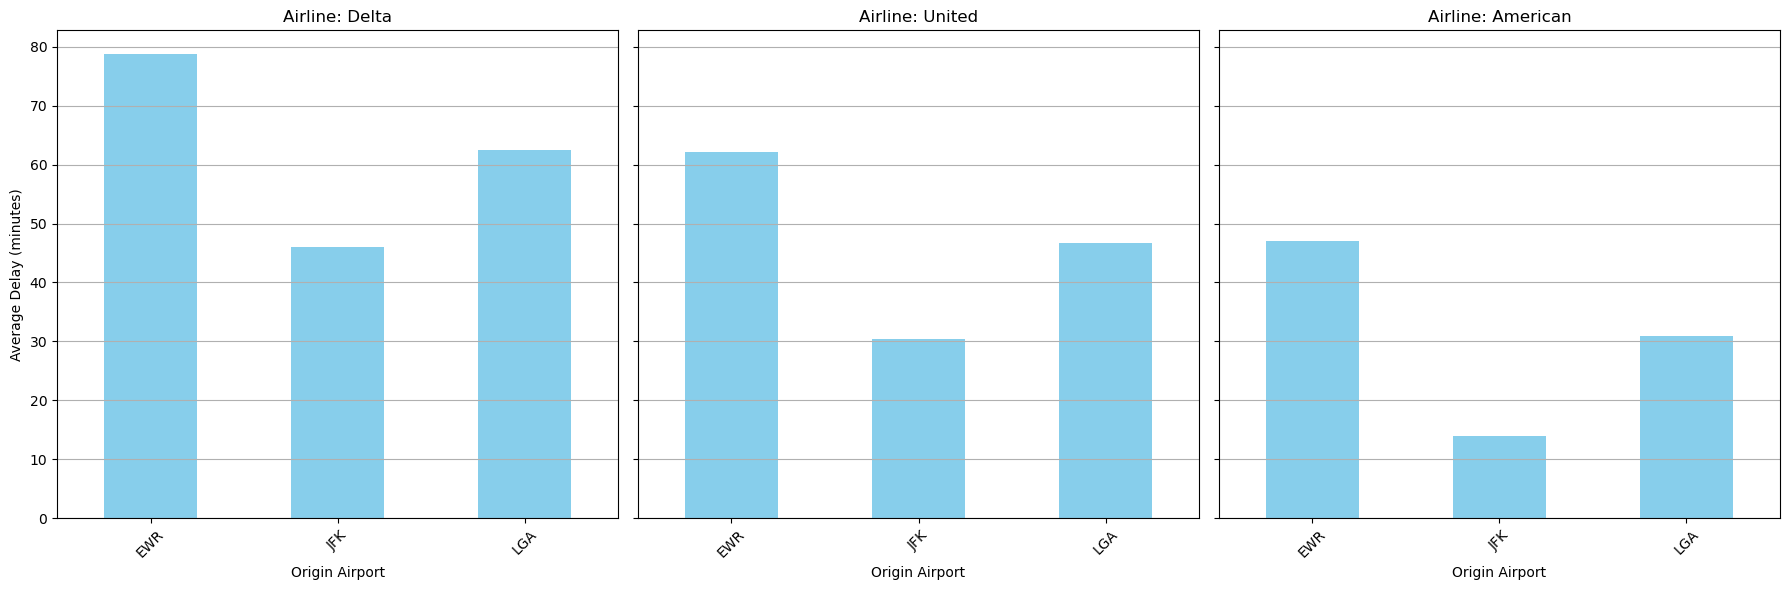

In [48]:
# Create subplots to visualize the average delay for each origin airport by airline
fig, axes = plt.subplots(1, len(airlines), figsize=(18, 6), sharey=True)

for ax, airline, avg_delay in zip(axes, airlines, average_delays):
    avg_delay.plot(kind='bar', ax=ax, title=f'Airline: {airline}', color='skyblue')
    ax.set_xlabel('Origin Airport')
    ax.set_ylabel('Average Delay (minutes)')
    ax.grid(axis='y')
    ax.set_xticklabels(avg_delay.index, rotation=45)

plt.tight_layout()
# plt.savefig('average_delay_per_origin_per_airline.png')
plt.show()

### Code Explanation:
- ***for ax, airline, avg_delay in zip(axes, airlines, average_delays):***:
    - **axes:** This is a list of subplot axes created by plt.subplots().
    - **airlines:** This is a list of airline names.
    - **average_delays:** This is a list of dataframes or series containing the average delays for each airline.
    - **zip(axes, airlines, average_delays):** This combines the axes, airline names, and average delays so that in each iteration of the loop, ax will be one subplot, airline will be one airline name, and avg_delay will be the average delay data for that airline.
- ***avg_delay.plot(kind='bar', ax=ax, title=f'Airline: {airline}', color='skyblue')***
    - **avg_delay.plot(kind='bar', ...)** creates a bar plot from the avg_delay data.
    - **ax=ax** specifies that this plot should be drawn on the current subplot axis (ax).
    - **title=f'Airline: {airline}'** sets the title of the subplot to indicate which airline's data is being displayed.
    - **color='skyblue'** sets the color of the bars in the plot to sky blue.
- ***Set X and Y Labels***:
    - **ax.set_xlabel('Origin Airport')** sets the label for the x-axis to "Origin Airport".
    - **ax.set_ylabel('Average Delay (minutes)')** sets the label for the y-axis to "Average Delay (minutes)".
- ***Add Gridlines***:
    - **ax.grid(axis='y')** adds horizontal gridlines to the plot, making it easier to read the y-axis values.
- ***Rotate X-axis Tick Labels***:
    - **ax.set_xticklabels(avg_delay.index, rotation=45)** sets the tick labels on the x-axis using the index of the avg_delay data (which represents the origin airports).
    - **rotation=45** rotates the tick labels by 45 degrees to make them easier to read, especially if they are long or numerous. 



Now, let's calculate some statistics of the flights dataframe:

In [49]:
# Calculate summary statistics
summary_stats = ddf[['delay_minutes', 'num_passengers', 'distance', 'flight_duration']].describe().compute()

print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
        delay_minutes  num_passengers        distance  flight_duration
count  1000000.000000  1000000.000000  1000000.000000   1000000.000000
mean        46.516327      424.974995     5493.100887       314.715888
std        124.569056      158.952257     2600.033067       164.986426
min       -100.000000      150.000000     1000.000000        30.000000
25%       -100.000000      310.750000     3628.250000       203.750000
50%         84.500000      451.000000     5930.500000       345.500000
75%        165.000000      583.000000     8075.250000       479.250000
max        419.000000      700.000000    10000.000000       600.000000


Finally, let's create some histograms to visualize the distribution of delay minutes, number of passengers, and distance in our flight dataframe:

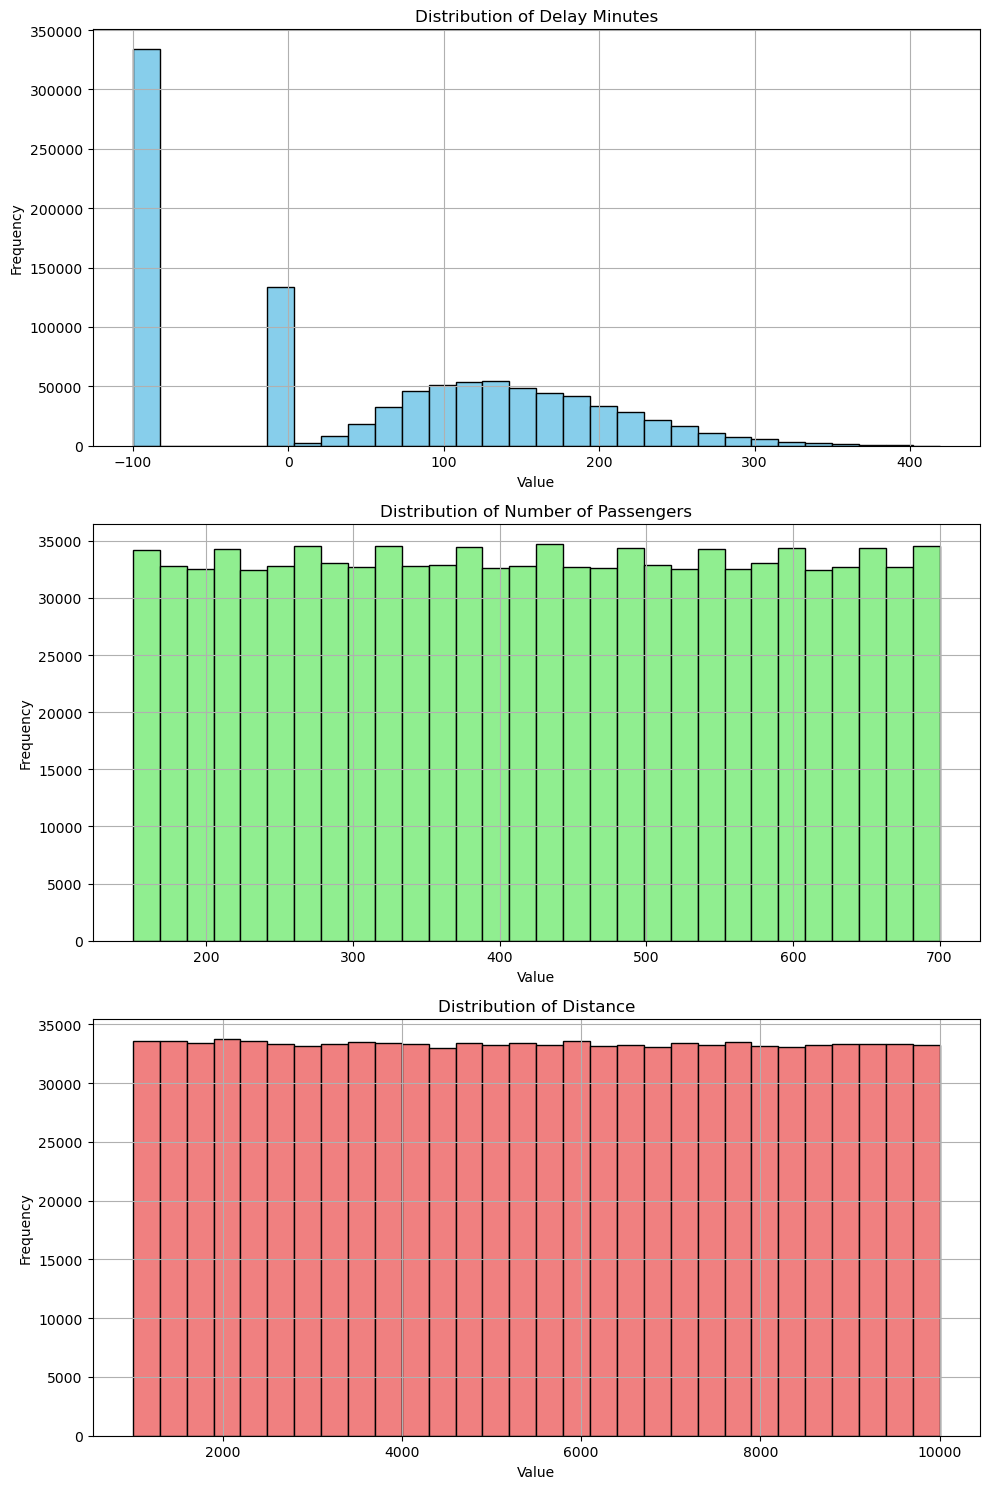

In [50]:
# Create histograms for delay_minutes, num_passengers, and distance
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot for delay_minutes
ddf['delay_minutes'].compute().hist(ax=axes[0], bins=30, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Delay Minutes')

# Plot for num_passengers
ddf['num_passengers'].compute().hist(ax=axes[1], bins=30, color='lightgreen', edgecolor='black')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Number of Passengers')

# Plot for distance
ddf['distance'].compute().hist(ax=axes[2], bins=30, color='lightcoral', edgecolor='black')
axes[2].set_xlabel('Value')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Distribution of Distance')

plt.tight_layout()
# plt.savefig('distribution_flight_data.png')
plt.show()


***Since we created random data, this information may be different for you.***

The first histogram displays the distribution of flight delays. The tallest bar, located at -100, represents canceled flights. This means most of the flights in our data were cancelled. Next, there's a big group of flights at 0, indicating around 125,000 flights had no delays. After that, we see fewer flights with longer delays. For example, about 50,000 flights experienced delays between 100 and 150 minutes.

This histogram helps us understand how many flights were canceled, on time, or delayed by different amounts.

In both histograms showing the number of passengers and the distance, the bars look almost the same height. This means the data is spread out evenly across the range of values we're looking at. So, there aren't any big differences in how often different numbers of passengers or distances occur. It's like having a bunch of cookies where each type is equally popular — there's no standout favorite.

## Exercise 2: Time to use Dask in Siku! (Breakout rooms)

- Create a python script to be used in Siku:
    - Copy and paste the code we developed in this Jupyter Notebook in the new python script.
    - **Note:** When creating a plot within a script ensure you use ***plt.savefig()*** to save your figure as a png image instead of showing it using plt.show().
- Open the Create_Data.py script and find the variables ***num_files*** and ***num_rows_per_file*** and change their values to 1000 each. This will generate a flight_data folder containing 1000 csv files with flight information (1000 rows each).
- Move your Python script to Siku, and create a job script to submit it. This job script should run both Create_Data.py and your analysis python script. Ensure appropriate modules are loaded. 
- Determine the appropriate amount of resources to request by submitting a job and checking the usage with seff. Update your job script accordingly, and save the seff report from the optimal job to a file LastName_FirstName_seff.txt . 
**Note**: This should **NOT** exceed 4 CPUs with 4 GB each, for more than 3 hours. 